# Linear Regression

`Linear Regression` is a supervised machine learning algorithm where the predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- **Simple regression** - only one independent variable (e.g. sales)
- **Multiple regression** - more than one independent variables (e.g. sales, price)

## Simple Linear Regression

Simple linear regression is an approach for predicting a `response` using a single feature. It is assumed that the two variables are `linearly related`. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

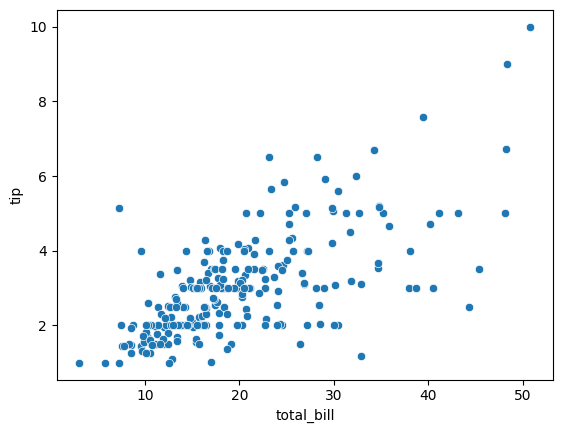

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [13]:
# split the data into X and y
X = df[['total_bill']]
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
y = df['tip']

In [16]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# call the model
model = LinearRegression()

In [18]:
# train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

1.2783010322799992
[4.91829658]
y =  1.2783010322799992 + [4.91829658] * X


In [20]:
model.predict([[5]])

array([25.86978394])

In [21]:
# predict
y_pred = model.predict(X_test)

In [22]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.8572572718597623
R2 =  0.4973251376187241
RMSE =  0.9258818887200259


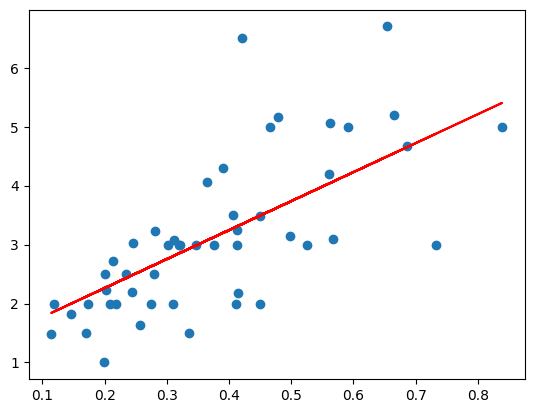

In [23]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [24]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
